In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
import keras
from keras.datasets import mnist
import PIL





In [2]:
(X_train,y_train), (X_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [3]:
type(X_train)

numpy.ndarray

In [4]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [5]:
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [11]:
print(X_train[10].shape)

(28, 28)


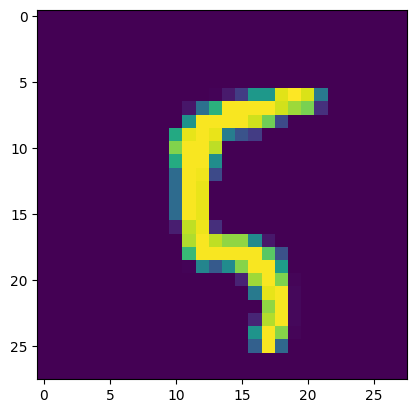

5


In [15]:
plt.imshow(X_train[100])
plt.show()

# print the corresponding label

print(y_train[100])

In [16]:
# unique vallue
print(np.unique(y_train))
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [17]:
#  scaling the value

X_train = X_train/255
X_test = X_test/255

In [19]:
print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

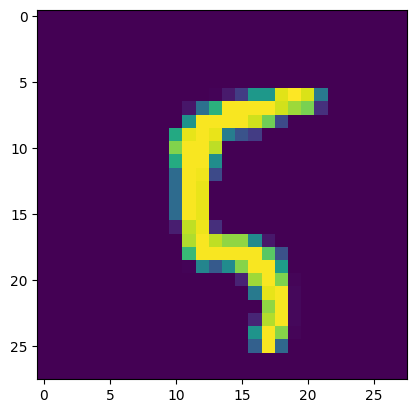

5


In [20]:
plt.imshow(X_train[100])
plt.show()

# print the corresponding label

print(y_train[100])

building neural network


In [21]:
model = keras.Sequential([
                            keras.layers.Flatten(input_shape = (28,28)),
                            keras.layers.Dense(50,activation='relu'),
                            keras.layers.Dense(50,activation='relu'),
                            keras.layers.Dense(10,activation='sigmoid')
])

In [24]:
# compiling
model.compile(optimizer='Adam',
              loss= 'sparse_categorical_crossentropy',
              metrics=['accuracy']
              )

In [25]:
model.fit(X_train, y_train, epochs=15)

Epoch 1/15


1875/1875 [==============================] - 4s 2ms/step - loss: 0.2967 - accuracy: 0.9148
Epoch 2/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1375 - accuracy: 0.9579
Epoch 3/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1011 - accuracy: 0.9691
Epoch 4/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0815 - accuracy: 0.9748
Epoch 5/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0671 - accuracy: 0.9791
Epoch 6/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0576 - accuracy: 0.9813
Epoch 7/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0509 - accuracy: 0.9838
Epoch 8/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0435 - accuracy: 0.9861
Epoch 9/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0396 - accuracy: 0.9874
Epoch 10/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0

In [27]:
loss,accuracy = model.evaluate(X_test,y_test)
print(f'Test data accuracy is : {accuracy}')

313/313 [==============================] - 1s 2ms/step - loss: 0.1371 - accuracy: 0.9693
Test data accuracy is : 0.9692999720573425


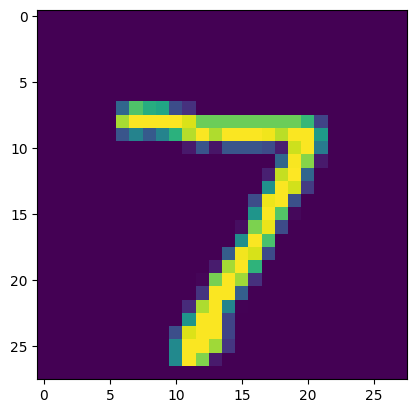

In [29]:
# firstdata poinrt in X_test

plt.imshow(X_test[0])
plt.show()


In [31]:
print(y_test[0])

7


In [32]:
y_pred = model.predict(X_test)
print(y_pred.shape)

313/313 [==============================] - 1s 1ms/step
(10000, 10)


In [33]:
print(y_pred[0])

[5.3668224e-05 8.9026021e-04 9.5469171e-01 9.9191582e-01 2.9236537e-07
 1.0409615e-03 1.2920499e-10 1.0000000e+00 9.1878101e-03 7.3003054e-01]


1.0000000e+00


In [34]:
# converting prediction to class label
label_for_first_image = np.argmax(y_pred[0])
print(label_for_first_image)

7


In [35]:
y_pred_labels = [np.argmax(i) for i in y_pred]
print(y_pred_labels)


[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 8, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 3, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 3, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [36]:
print(y_pred)

[[5.3668224e-05 8.9026021e-04 9.5469171e-01 ... 1.0000000e+00
  9.1878101e-03 7.3003054e-01]
 [3.9526480e-05 7.7621847e-01 1.0000000e+00 ... 4.4543640e-06
  1.9007204e-01 6.7329790e-13]
 [1.2397550e-05 9.9956024e-01 3.1962642e-01 ... 1.9606766e-03
  2.4548398e-01 3.6048945e-03]
 ...
 [8.1895496e-07 6.6627362e-03 5.7158225e-08 ... 3.7965491e-02
  8.8892657e-06 9.4391096e-01]
 [4.6056066e-09 3.4852535e-05 3.6743699e-04 ... 1.2453085e-02
  8.8613009e-01 3.6543400e-07]
 [3.7085155e-07 6.4650112e-09 1.9436724e-08 ... 4.0297490e-10
  3.8350045e-05 1.7426762e-04]]


In [37]:
conf_mat = tf.math.confusion_matrix(y_test,y_pred_labels)

In [38]:
print(conf_mat)

tf.Tensor(
[[ 968    0    0    1    1    2    1    3    2    2]
 [   0 1122    4    3    0    1    2    0    3    0]
 [   7    2 1008    3    1    0    0    6    4    1]
 [   0    0    5  979    1    5    0    5    4   11]
 [   2    0    8    1  957    0    6    1    1    6]
 [   3    0    0   13    2  862    4    1    3    4]
 [   9    3    4    1   10    6  918    2    5    0]
 [   0    5   13    1    0    1    1 1000    2    5]
 [   9    0   12   18    5   13    3    4  906    4]
 [   2    2    0    6   14    5    0    9    1  970]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'prediction labels')

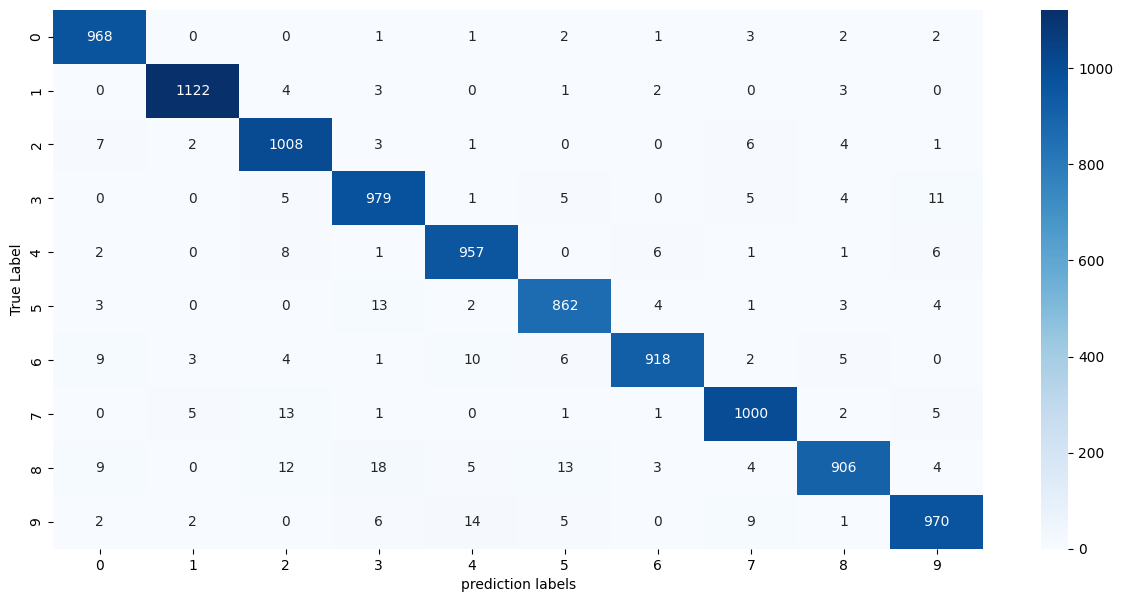

In [39]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot= True, fmt='d', cmap = 'Blues')

plt.ylabel('True Label')
plt.xlabel('prediction labels')

checking the system

In [44]:
input_image_path = r'C:\DeepLearning\DigitClassification\data\output.png'
input_image = cv2.imread(input_image_path)


In [45]:
type(input_image)

numpy.ndarray

In [46]:
print(input_image)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


(127, 127, 3)

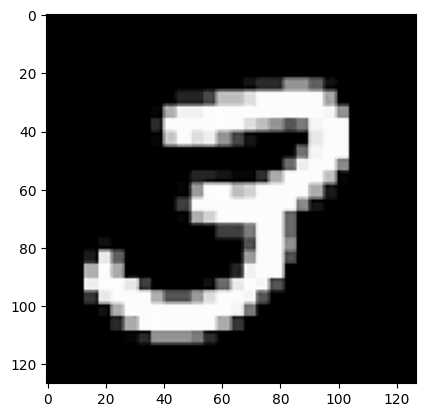

In [48]:
plt.imshow(input_image)
input_image.shape

In [49]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)
grayscale.shape

(127, 127)

In [52]:
grayscale_resized = cv2.resize(grayscale, (28,28))

In [53]:
grayscale_resized.shape

(28, 28)

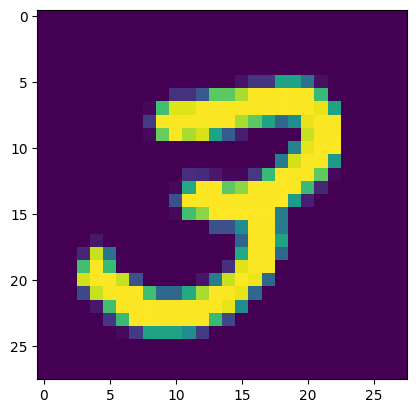

In [54]:
plt.imshow(grayscale_resized)

In [55]:
grayscale_resized = grayscale_resized/255

In [56]:
grayscale_resized

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [57]:
grayscale_reshaped = np.reshape(grayscale_resized, [1,28,28])

In [58]:
grayscale_reshaped

array([[[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.

In [59]:
grayscale_pred = model.predict(grayscale_reshaped)
print(grayscale_pred)

1/1 [==============================] - 0s 126ms/step
[[4.4574022e-11 8.9658378e-09 1.9912558e-04 1.0000000e+00 4.5084864e-13
  1.5438241e-03 3.1440586e-13 1.3391279e-08 7.1220635e-04 6.6726670e-02]]


In [60]:
grayscale_pred_label = np.argmax(grayscale_pred)
print(grayscale_pred_label)


3


In [61]:
print(f'Handwritten image recognised as',grayscale_pred_label)

Handwritten image recognised as 3
